## Curvas de resposta do controle do gimbal

In [28]:
from numpy import pi
import numpy as np
from matplotlib import pyplot as plt
import mplcursors
%matplotlib widget

#preferencia dos graficos
plt.rcParams['lines.linewidth'] = 1

#função para mapear 0 - 2pi para -pi - pi
def f(x:float):
    if x > pi:
        return x-2*pi
    elif x < -pi:
        return x+2*pi
    else:
        return x
#vetorizar a função para aplicar diretamente no array
ang_adj = np.vectorize(f)


#função para mapear 0 - 2pi para -pi - pi
def r2d(x:float):
    return 180*x/pi
#vetorizar a função para aplicar diretamente no array
degree = np.vectorize(r2d)

### Primeira curva é do tracking de cores com mudança na referencia

São feitos 3 plots comparando as referencias aos valores de posição do objeto na tela e da rotação.

O video da resposta esta gravado:

In [29]:
from IPython.display import Video
Video("cores_2.mp4")

[Text(0, 0.5, 'Rotação (rad)')]

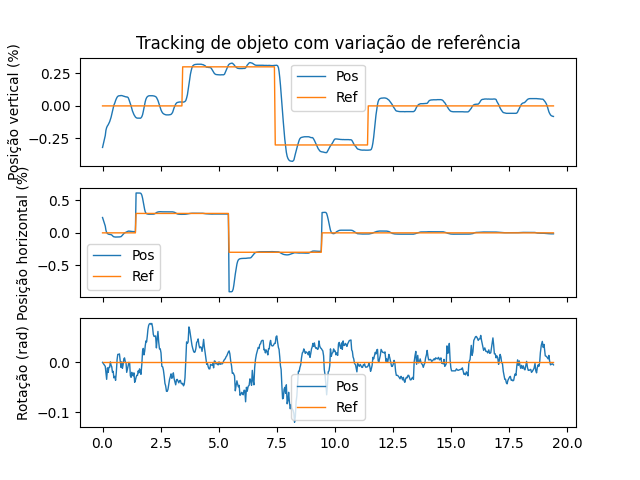

In [30]:
file = 'curva_cores_ref.txt'

[x1, y1, ang1, x2, y2, ang2, t] = np.loadtxt(file, unpack=True)
# y = data[:,1]
t = t - t[0]  # inicia tempo com 0

x1 = x2+x1
y1 = y2+y1

fig,(ax,ay,an) = plt.subplots(3)
mplcursors.cursor(hover=True)
ax.plot(t, y1, t, y2)
ax.set_title('Tracking de objeto com variação de referência')
ax.legend(['Pos','Ref'])
ax.set(ylabel='Posição vertical (%)')
ax.label_outer()
# ay.set_title('Resposta da camera em tracking de objeto')
ay.plot(t,x1,t,x2)
ay.legend(['Pos','Ref'])
ay.label_outer()
ay.set( ylabel='Posição horizontal (%)')

an.plot(t,ang1,t,ang2)
an.legend(['Pos','Ref'])
an.set( ylabel='Rotação (rad)')
# ax.show()


### Curvas sem feedback da camera

é possivel fazer 3 testes com o controle do gimbal sem a camera
1. base parada e mudança de setpoint
   Dados de 3 eixos, referencia e saida

2. base se movendo(disturbio) e setpoint fixo
3. disturbio + setpoint variavel

## CURVA ZERO

Primeiro mostrar o gimbal parado e como o PI junto com o zona morta e a folga atrapalham

## Primeira Curva

Mudança na referência da orientação


[Text(0, 0.5, 'Yaw')]

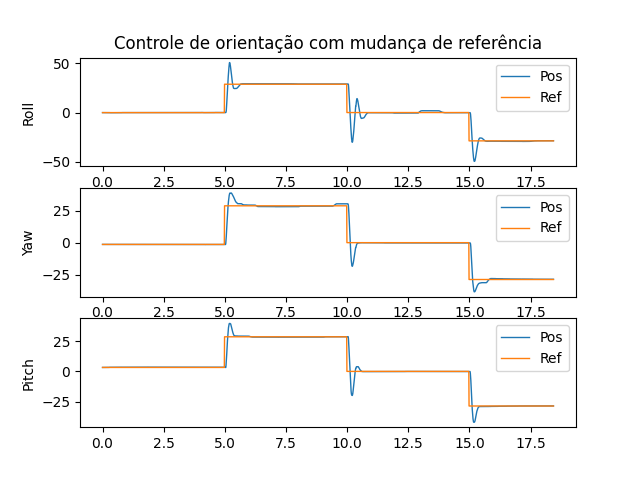

In [35]:
file = 'curvas_1/orient_ref_only.txt'

#roll pitch yaw
[r, p, y, r2, p2, y2, t] = np.loadtxt(file, unpack=True)
t = t - t[0]  # inicia tempo com 0
r = ang_adj(r)

ags = [r, p, y, r2, p2, y2]
[r, p, y, r2, p2, y2] = degree(ags)

fig,(ar,ap,ay) = plt.subplots(3)
ar.plot(t, r, t, r2)
ar.set_title('Controle de orientação com mudança de referência')
ar.legend(['Pos','Ref'])
ar.set(ylabel='Roll')
ax.label_outer()
# ay.set_title('Resposta da camera em tracking de objeto')
ay.plot(t,y,t,y2)
ay.legend(['Pos','Ref'])
ay.label_outer()
ay.set( ylabel='Pitch')

ap.plot(t,p,t,p2)
ap.legend(['Pos','Ref'])
ap.set( ylabel='Yaw')